# MSN 514 - Chapter 03: Schrödinger

## Double Pendulum in PyGame

In [2]:
## THE CALCULATION PART

# Constants
m1 = 1.0  # mass of ball 1
m2 = 1.0  # mass of ball 2
L1 = 100  # length of the pendulum 1
L2 = 100  # length of the pendulum 2
g = 9.8  # acceleration due to gravity
dt = 0.001  # time step
Nt = 100  # number of time steps

# Initial conditions
th1 = 0.0  # initial angle theta1
th2 = 0.0  # initial angle theta2
om1 = 0.0  # initial angular velocity of ball 1
om2 = 0.1  # initial angular velocity of ball 2

def update_variables(th1, th2, om1, om2, Nt, dt):

    for nt in range(Nt):

        x1 = L1 * np.sin(th1)
        y1 = -L1 * np.cos(th1)
        x2 = x1 + L2 * np.sin(th2)
        y2 = y1 - L2 * np.cos(th2)

        vx1 = L1 * np.cos(th1) * om1
        vy1 = L1 * np.sin(th1) * om1
        vx2 = vx1 + L2 * np.cos(th2) * om2
        vy2 = vy1 + L2 * np.sin(th2) * om2

        # Calculate the angular acceleration of ball 1 and ball 2
        num1 = -g * (2 * m1 + m2) * np.sin(th1) - m2 * g * np.sin(th1 - 2 * th2) - 2 * np.sin(th1 - th2) * m2 * (om2**2 * L2 + om1**2 * L1 * np.cos(th1 - th2))
        den1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
        al1 = num1 / den1

        num2 = 2 * np.sin(th1 - th2) * (om1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1) + om2**2 * L2 * m2 * np.cos(th1 - th2))
        den2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
        al2 = num2 / den2

        # Update the angles using Verlet integration
        th1 = th1 + om1 * dt + al1 * dt**2 / 2
        th2 = th2 + om2 * dt + al2 * dt**2 / 2

        # Predict next angular velocities
        om1_next = om1 + al1 * dt
        om2_next = om2 + al2 * dt

        # Calculate the next angular acceleration of ball 1 and ball 2
        num1 = -g * (2 * m1 + m2) * np.sin(th1) - m2 * g * np.sin(th1 - 2 * th2) - 2 * np.sin(th1 - th2) * m2 * (om2_next**2 * L2 + om1_next**2 * L1 * np.cos(th1 - th2))
        den1 = L1 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
        al1_next = num1 / den1

        num2 = 2 * np.sin(th1 - th2) * (om1_next**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(th1) + om2_next**2 * L2 * m2 * np.cos(th1 - th2))
        den2 = L2 * (2 * m1 + m2 - m2 * np.cos(2 * th1 - 2 * th2))
        al2_next = num2 / den2    

        # Update the angular velocities
        om1 = om1 + (al1 + al1_next)/2 * dt
        om2 = om2 + (al2 + al2_next)/2 * dt

    return x1, y1, x2, y2, th1, th2, om1, om2


## THE ANIMATION PART

import pygame
import numpy as np
import sys

# Initialize Pygame
pygame.init()

# Screen dimensions
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Double Pendulum Animation")

# Colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
blue = (0, 0, 255)

# Clock for controlling the frame rate
clock = pygame.time.Clock()

def draw_pendulum(screen, x1, y1, x2, y2):
    screen.fill(black)
    pygame.draw.line(screen, white, (width/2, height/2), (width/2 + x1, height/2 - y1), 4)
    pygame.draw.line(screen, white, (width/2 + x1, height/2 - y1), (width/2 + x2, height/2 - y2), 4)
    pygame.draw.circle(screen, blue, (width/2 + x1, height/2 - y1), 20)
    pygame.draw.circle(screen, red, (width/2 + x2, height/2 - y2), 20)
    

running = True
t = 0
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                running = False
            elif event.key == pygame.K_s:
                th1 = 0.0
                th2 = 0.0
                om1 = 0.0
                om2 = 0.0
            elif event.key == pygame.K_w:
                th1 = np.pi
                th2 = np.pi + np.random.normal()/100
                om1 = 0.0
                om2 = 0.0
            elif event.key == pygame.K_d:
                om2 = om2 + 1
            elif event.key == pygame.K_a:
                om2 = om2 - 1
    
    x1, y1, x2, y2, th1, th2, om1, om2 = update_variables(th1, th2, om1, om2, Nt, dt)
    draw_pendulum(screen, x1, y1, x2, y2)
    
    pygame.display.update()
    
    # Cap the frame rate
    clock.tick(60)

pygame.quit()
sys.exit()

KeyboardInterrupt: 

## Schrödinger Equation

In [4]:
## THE CALCULATION PART

import numpy as np
from scipy.linalg import expm

# Length => Å (Angstrom)
# Time => fs (femtosecond)
# Energy => eV (electronvolt)

Nt = 10
dt = 0.001

hb = 0.658  # reduced Planck's constant
me = 0.057  # mass of electron

L = 10
N = 301
dx = L/N
x = (np.linspace(0, N, N, endpoint=False)) * dx

# kinetic energy term
ke = -hb ** 2 / (2 * me * dx ** 2)

# E1
E1 = np.pi ** 2 * hb ** 2 / (2 * me * L ** 2)

# Hamiltonian
H = np.zeros((N, N), dtype=complex)

# Momentum operator
P = np.zeros((N, N), dtype=complex)

# Position operator
X = np.zeros((N, N), dtype=complex)

for n in range(1, N - 1):
    H[n, n] = -2 * ke
    H[n, n - 1] = ke
    H[n, n + 1] = ke
    P[n, n + 1] = hb / (2j * dx)
    P[n, n - 1] = -hb / (2j * dx)
    X[n, n] = x[n]

P[0, 1] = hb / (2j * dx)
P[N - 1, N - 2] = -hb / (2j * dx)
X[0, 0] = x[0]
X[N - 1, N - 1] = x[N - 1]

H[0, 0] = -2 * ke
H[0, 1] = ke
H[N - 1, N - 1] = -2 * ke
H[N - 1, N - 2] = ke

# Quantum time-evolution operator
U = expm(-1j * H * dt / hb)


# Initial wavefunction
f0 = np.sin(np.pi / L * x) + np.sin(2*np.pi / L * x)
f0 = f0 / np.linalg.norm(f0)

f = f0

# Schrödinger equation
def update_wavefunction(f, U, Nt):
    for nt in range(Nt):
        f = np.dot(U, f)
    return f

# Wavefunction collapse
def measure(Q, f):
    N = f.shape[0]
    evals, evecs = np.linalg.eig(Q)
    c = np.conj(evecs.T) @ f
    c2 = np.abs(c) ** 2 / np.sum(np.abs(c) ** 2)
    r = np.random.rand() # throw dice
    s = 0
    for n in range(N):
        s += c2[n]
        if s > r:
            break
    f = evecs[:, n]
    out = evals[n]
    return f, out


## THE ANIMATION PART

import pygame
import numpy as np
import sys

# Initialize Pygame
pygame.init()

# Screen dimensions
width, height = 800, 1000
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Double Pendulum Animation")

# Colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)

# Clock for controlling the frame rate
clock = pygame.time.Clock()

def draw_wavefunction(screen, f):
    screen.fill(black)
    xs = np.linspace(0, width, N)
    frs = f.real
    fis = f.imag
    fas = np.abs(f)
    for i in range(N):
        pygame.draw.circle(screen, white, (int(xs[i]), int(height/2)), 2)
        pygame.draw.circle(screen, green, (int(xs[i]), int(height/2 - fas[i]*4000)), 4)
        pygame.draw.circle(screen, red, (int(xs[i]), int(height/2 - frs[i]*4000)), 2)
        pygame.draw.circle(screen, blue, (int(xs[i]), int(height/2 - fis[i]*4000)), 2)
    

running = True
t = 0
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                running = False
            elif event.key == pygame.K_r: # reset the wavefunction
                f = f0
            elif event.key == pygame.K_f: # run faster
                Nt = Nt*2
            elif event.key == pygame.K_s: # run slower
                Nt = Nt//2
            elif event.key == pygame.K_e: # measure energy
                f, energy = measure(H, f)
                print(energy/E1)
            elif event.key == pygame.K_p: # measure momentum
                f, momentum = measure(P, f)
                print(momentum)
            elif event.key == pygame.K_x: # measure position
                f, position = measure(X, f)
                print(position)
    
    f = update_wavefunction(f, U, Nt)
    draw_wavefunction(screen, f)
    
    pygame.display.update()
    
    # Cap the frame rate
    clock.tick(60)

pygame.quit()
sys.exit()

(0.9933794896193102+0j)


KeyboardInterrupt: 

## Fourier Transform and Uncertainty

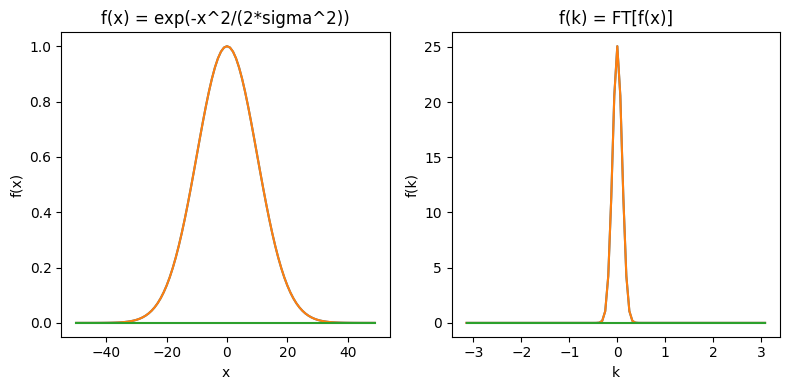

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
L = 100
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

FT = np.array([np.exp(-1j * k[nk] * x) for nk in range(N)])

sigma = 10
f_x = np.exp(-x**2/(2*sigma**2))

f_k = FT @ f_x

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(x, f_x)
axs[0].plot(x, np.real(f_x))
axs[0].plot(x, np.imag(f_x))
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('f(x) = exp(-x^2/(2*sigma^2))')

axs[1].plot(k, f_k)
axs[1].plot(k, np.real(f_k))
axs[1].plot(k, np.imag(f_k))
axs[1].set_xlabel('k')
axs[1].set_ylabel('f(k)')
axs[1].set_title('f(k) = FT[f(x)]')

plt.tight_layout()
plt.show()


## Free Particle

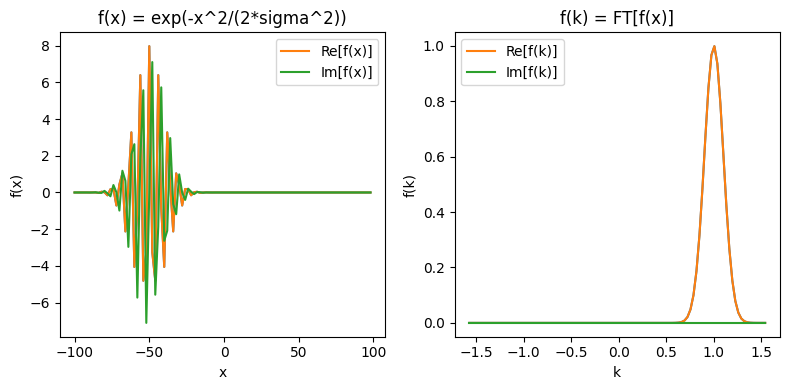

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
L = 200
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

FT = np.array([np.exp(-1j * k[nk] * x) for nk in range(N)])
IFT = FT.conj().T

k0 = 1
x0 = -50
sigma_k = 0.1
f_k = np.exp(-(k-k0)**2/(2*sigma_k**2))

f_x = IFT @ f_k
f_x = np.roll(f_x, int(x0/dx))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(x, f_x)
axs[0].plot(x, np.real(f_x), label='Re[f(x)]')
axs[0].plot(x, np.imag(f_x), label='Im[f(x)]')
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('f(x) = exp(-x^2/(2*sigma^2))')

axs[1].plot(k, f_k)
axs[1].plot(k, np.real(f_k), label='Re[f(k)]')
axs[1].plot(k, np.imag(f_k), label='Im[f(k)]')
axs[1].legend()
axs[1].set_xlabel('k')
axs[1].set_ylabel('f(k)')
axs[1].set_title('f(k) = FT[f(x)]')

plt.tight_layout()
plt.show()

## Tunneling

In [9]:
## THE CALCULATION PART

import numpy as np
from scipy.linalg import expm

# Length => Å (Angstrom)
# Time => fs (femtosecond)
# Energy => eV (electronvolt)

Nt = 10
dt = 0.001

hb = 0.658  # reduced Planck's constant
me = 0.057  # mass of electron

import numpy as np
import matplotlib.pyplot as plt

N = 1000
L = 200
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

FT = np.array([np.exp(-1j * k[nk] * x) for nk in range(N)])
IFT = FT.conj().T

k0 = 1
x0 = -50
sigma_k = 0.1
f_k = np.exp(-(k-k0)**2/(2*sigma_k**2))

f_x = IFT @ f_k
f_x = np.roll(f_x, int(x0/dx))


# kinetic energy term
ke = -hb ** 2 / (2 * me * dx ** 2)

# Kinetic energy operator
T = np.zeros((N, N), dtype=complex)

# Potential energy operator
V = np.zeros((N, N), dtype=complex)
for n in range(-10,11):
    V[N//2+n,N//2+n] = 5

# Hamiltonian
H = np.zeros((N, N), dtype=complex)

# Momentum operator
P = np.zeros((N, N), dtype=complex)

# Position operator
X = np.zeros((N, N), dtype=complex)

for n in range(1, N - 1):
    T[n, n] = -2 * ke
    T[n, n - 1] = ke
    T[n, n + 1] = ke
    P[n, n + 1] = hb / (2j * dx)
    P[n, n - 1] = -hb / (2j * dx)
    X[n, n] = x[n]

P[0, 1] = hb / (2j * dx)
P[N - 1, N - 2] = -hb / (2j * dx)
X[0, 0] = x[0]
X[N - 1, N - 1] = x[N - 1]

T[0, 0] = -2 * ke
T[0, 1] = ke
T[N - 1, N - 1] = -2 * ke
T[N - 1, N - 2] = ke

H = T + V

# Quantum time-evolution operator
U = expm(-1j * H * dt / hb)


# Initial wavefunction
f0 = f_x
f0 = f0 / np.max(np.abs(f0))

f = f0

# Schrödinger equation
def update_wavefunction(f, U, Nt):
    for nt in range(Nt):
        f = np.dot(U, f)
    return f

# Wavefunction collapse
def measure(Q, f):
    N = f.shape[0]
    evals, evecs = np.linalg.eig(Q)
    c = np.conj(evecs.T) @ f
    c2 = np.abs(c) ** 2 / np.sum(np.abs(c) ** 2)
    r = np.random.rand()
    s = 0
    for n in range(N):
        s += c2[n]
        if s > r:
            break
    f = evecs[:, n]
    out = evals[n]
    return f, out


## THE ANIMATION PART

import pygame
import numpy as np
import sys

# Initialize Pygame
pygame.init()

# Screen dimensions
width, height = 800, 1000
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Free Particle Animation")

# Colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)

# Clock for controlling the frame rate
clock = pygame.time.Clock()

def draw_wavefunction(screen, f):
    screen.fill(black)
    xs = np.linspace(0, width, N)
    frs = f.real
    fis = f.imag
    fas = np.abs(f)    
    pygame.draw.lines(screen, white, False, [(int(xs[i]), int(height/2 - 100*V[i,i].real)) for i in range(N)], 2)
    for i in range(N):
        pygame.draw.circle(screen, green, (int(xs[i]), int(height/2 - fas[i]*300)), 4)
        pygame.draw.circle(screen, red, (int(xs[i]), int(height/2 - frs[i]*300)), 2)
        pygame.draw.circle(screen, blue, (int(xs[i]), int(height/2 - fis[i]*300)), 2)
    

running = True
t = 0
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_q:
                running = False
            elif event.key == pygame.K_r: # reset the wavefunction
                f = f0
            elif event.key == pygame.K_f: # run faster
                Nt = Nt*2
            elif event.key == pygame.K_s: # run slower
                Nt = Nt//2
            elif event.key == pygame.K_e: # measure energy
                f, energy = measure(H, f)
                print(energy/E1)
            elif event.key == pygame.K_p: # measure momentum
                f, momentum = measure(P, f)
                print(momentum)
            elif event.key == pygame.K_x: # measure position
                f, position = measure(X, f)
                print(position)
    
    f = update_wavefunction(f, U, Nt)
    draw_wavefunction(screen, f)
    
    pygame.display.update()
    
    # Cap the frame rate
    clock.tick(60)

pygame.quit()
sys.exit()

KeyboardInterrupt: 

## Particle in a Well

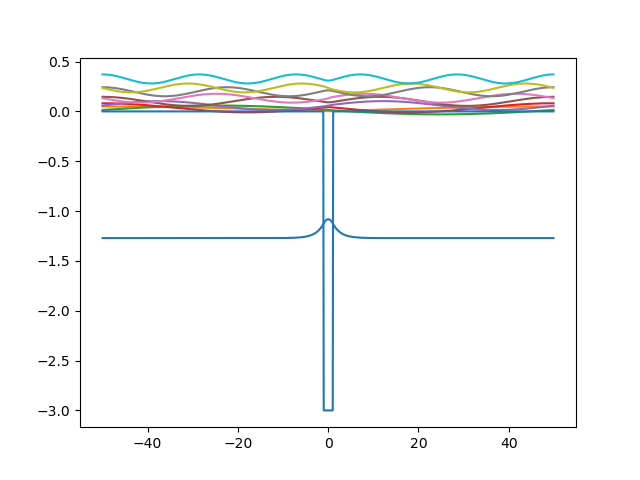

[-1.27102417  0.00404721]


(-9.560114617715461e-12-1.2026649563159045e-12j)

In [17]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

# Length => Å (Angstrom)
# Time => fs (femtosecond)
# Energy => eV (electronvolt)

hb = 0.658  # reduced Planck's constant
me = 0.057  # mass of electron

N = 1000
L = 100
V0 = 3
L0 = 2
dx = L/N
dk = 2*np.pi/L
x = (np.linspace(0, N, N, endpoint=False) - N//2) * dx
k = (np.linspace(0, N, N, endpoint=False) - N//2) * dk

FT = np.array([np.exp(-1j * k[nk] * x) for nk in range(N)])

D = FT.conj().T @ (np.diag(1j * k) @ FT / N)
DD = D @ D

P = hb/1j * D
T = -hb**2/(2*me) * DD

V_single = np.zeros((N,N))
for n in range(N):
    if (x[n] >= -L0/2) and (x[n] <= L0/2):
        V_single[n,n] = -V0

H = T + V_single

evals, evecs = np.linalg.eig(H)
idx = evals.argsort()
evals = evals[idx]
evecs = evecs[:,idx]

fs = evecs[:,0]
Vs = np.diag(V_single)

plt.clf()
for n in range(10):
    plt.plot(x, evals[n].real+evecs[:,n].real)
plt.plot(x, np.diag(V_single).real)
plt.show()

print(evals[:2].real)

evecs[:,2].conj().T @ evecs[:,1]



## Two interacting wells

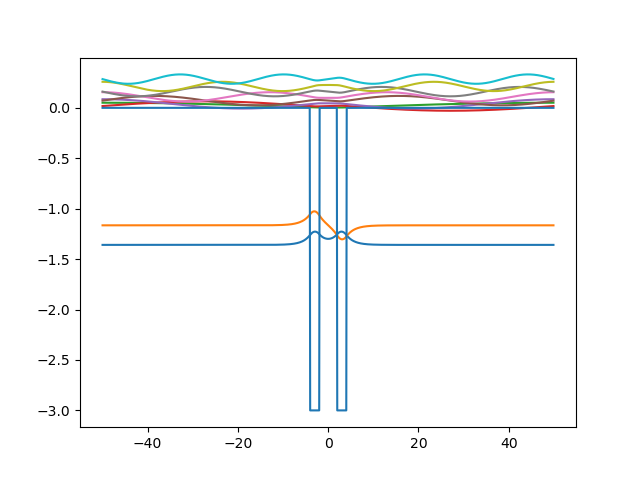

[-1.35881138 -1.16490275  0.00437202  0.01794659]


(-1.2841470901128392e-14+1.495044612886835e-14j)

In [38]:
%matplotlib widget

d = 6
Nd = int(d/2/dx)

Vn = np.roll(Vs, -Nd)
Vp = np.roll(Vs, Nd)

# plt.plot(Vn)
# plt.plot(Vp)

fn = np.roll(fs, -Nd)
fp = np.roll(fs, Nd)

V_double = np.diag(Vn + Vp)
# plt.plot(np.diag(V_double))

H = T + V_double

evals, evecs = np.linalg.eig(H)
idx = evals.argsort()
evals = evals[idx]
evecs = evecs[:,idx]

plt.clf()
for n in range(10):
    plt.plot(x, evals[n].real+evecs[:,n].real)
plt.plot(x, np.diag(V_double))
plt.show()

print(evals[:4].real)

evecs[:,2].conj().T @ evecs[:,1]

## Linear combination of orbitals

In [40]:
Vppp = fp.conj().T @ (Vp*fp)
Vpnp = fp.conj().T @ (Vn*fp)
Vppn = fp.conj().T @ (Vp*fn)
Vpnn = fp.conj().T @ (Vn*fn)
Vnpp = fn.conj().T @ (Vp*fp)
Vnnp = fn.conj().T @ (Vn*fp)
Vnpn = fn.conj().T @ (Vp*fn)
Vnnn = fn.conj().T @ (Vn*fn)

Spp = fp.conj().T @ fp
Spn = fp.conj().T @ fn
Snp = fn.conj().T @ fp
Snn = fn.conj().T @ fn

# print(Vppp.real, Vpnp.real, Vppn.real, Vpnn.real)
# print(Vnpp.real, Vnnp.real, Vnpn.real, Vnnn.real)
# print(Spp.real, Spn.real, Snp.real, Snn.real)

# Spn = 0
# Snp = 0

Vm = np.array([[Vppp+Vpnp, Vppn+Vpnn],[Vnpp+Vnnp, Vnpn+Vnnn]])
Vm = Vm.real
Sm = np.array([[Spp, Spn],[Snp, Snn]])
Sm = Sm.real
# print(Vm)
# print(Sm)

# Ep, v = np.linalg.eig(np.linalg.inv(Sm) @ Vm)
Ep, v = np.linalg.eig(Vm)

Ek = fs.conj().T @ (T @ fs)
# Ek2 = fn.conj().T @ (T @ fn)
# print(Ek1.real, Ek2.real)

Et = Ek + Ep

print(Vm)
# print(Sm)
# print(Et.real)
# print(v)

[[-1.93039204 -0.1909407 ]
 [-0.1909407  -1.93039204]]


## SSH Model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

def plot_phon(t):
    a = 1
    t1 = t
    t2 = 1/t
    kpts = np.linspace(-np.pi/a, np.pi/a, 100)

    def energy(k):
        D = np.array([
            [0, -t1 - t2*np.exp(-1j*k*a)],
            [-t1 - t2*np.exp(1j*k*a), 0]
        ])

        E, v = np.linalg.eig(D)
        return np.sort(E)

    E = []
    for k in kpts:
        E.append(energy(k))
    E = np.array(E)

    plt.clf()
    plt.plot(kpts, E)
    plt.xlabel('k')
    plt.ylabel('Frequency')
    plt.title('SSH Model')
    plt.grid(True)
    plt.show()

ipywidgets.interact(plot_phon, t=(0, 2, 0.1))

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0), Output()), _dom_classes=('widget-inter…

<function __main__.plot_phon(t)>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

def plot_phon(t):
    a = 1
    m = 1
    t1 = t
    t2 = 1/t
    kpts = np.linspace(-np.pi/a, np.pi/a, 1000)

    def band(k):
        D = np.array([
            [0, -t1 - t2*np.exp(-1j*k*a)],
            [-t1 - t2*np.exp(1j*k*a), 0]
        ])

        E, v = np.linalg.eig(D)
        sorted_indices = np.argsort(E)
        E = E[sorted_indices]
        v = v[:, sorted_indices]
        return E, v

    E = []
    V = []
    for k in kpts:
        E.append(band(k)[0])
        V.append(band(k)[1])
    E = np.array(E)
    V = np.array(V)

    fig, axs = plt.subplots(1, 3)
    axs[0].plot(kpts, E)
    axs[0].grid(True)

    axs[1].plot((-t1 - t2*np.exp(-1j*kpts*a)).real, (-t1 - t2*np.exp(-1j*kpts*a)).imag)
    axs[1].plot(0,0,'o')
    axs[1].axis('square')

    axs[2].plot((V[:,1,0]/V[:,0,0]).real+kpts/10,(V[:,1,0]/V[:,0,0]).imag)
    axs[2].plot((V[:,1,1]/V[:,0,1]).real+kpts/10,(V[:,1,1]/V[:,0,1]).imag)
    axs[2].grid(True)

    plt.show()

ipywidgets.interact(plot_phon, t=(0, 2, 0.1))

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0), Output()), _dom_classes=('widget-inter…

<function __main__.plot_phon(t)>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

def tune_plot(t):
    N = 100
    t1 = t
    t2 = 1/t

    d = np.tile([-t1, -t2], N//2 + 1)
    A = np.diag(d[:N-1], 1) + np.diag(d[:N-1], -1)

    D, V = np.linalg.eig(A)
    sorted_indices = np.argsort(D)
    D = D[sorted_indices]
    V = V[:, sorted_indices]

    fig, axs = plt.subplots(1, 2)

    axs[0].plot(D, '.-')
    axs[0].set_title('Eigenvalues')
    axs[1].plot(V[:, N//2])
    axs[1].set_title('Eigenvector')

    plt.show()

ipywidgets.interact(tune_plot, t=(0, 2, 0.01))

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.tune_plot(t)>

## Nanoribbons

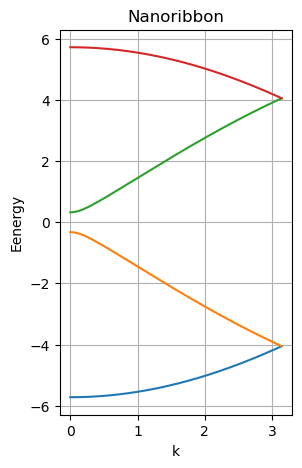

In [44]:
a = 1
kpts = np.linspace(0, np.pi/a, 1000)

t = -2.7
te = -2.7*1.12
def energy(k):
    D = np.array([
        [0, t, 0, te*np.exp(-1j*k*a)],
        [t, 0, te, 0],
        [0, te, 0, t],
        [te*np.exp(1j*k*a), 0, t, 0]
    ])

    E, v = np.linalg.eig(D)
    return np.sort(E)

E = []
for k in kpts:
    E.append(energy(k))
E = np.array(E)

plt.figure(figsize=(3, 5))
plt.plot(kpts, E)
plt.xlabel('k')
plt.ylabel('Eenergy')
plt.title('Nanoribbon')
plt.grid(True)
plt.show()